<a href="https://colab.research.google.com/github/ajinkyajumde/customer-prediction/blob/main/Final_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from statsmodels.stats.outliers_influence import variance_inflation_factor
from google.colab import drive
from datetime import datetime
import datetime as dt
from imblearn.over_sampling import ADASYN
# Importing XGBoost
from xgboost import XGBClassifier
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#mounting the google drive for importing the csv files uploaded on the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#assigning the neccessary path to create a dataframe for the pandas operation
data='/content/drive/MyDrive/Almabetter projects/Customer prediction/train_wn75k28.csv'
test_dataset=pd.read_csv(data)

## **DATA INSPECTION**

In [ ]:
test_dataset.head(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
test_dataset.tail(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
test_dataset.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [ ]:
test_dataset=test_dataset.drop(columns=['signup_date','id'],axis=1)

In [ ]:
test_dataset=test_dataset.fillna(0)

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            39161 non-null  object 
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    39161 non-null  float64
 4   user_activity_var_1   39161 non-null  int64  
 5   user_activity_var_2   39161 non-null  int64  
 6   user_activity_var_3   39161 non-null  int64  
 7   user_activity_var_4   39161 non-null  int64  
 8   user_activity_var_5   39161 non-null  int64  
 9   user_activity_var_6   39161 non-null  int64  
 10  user_activity_var_7   39161 non-null  int64  
 11  user_activity_var_8   39161 non-null  int64  
 12  user_activity_var_9   39161 non-null  int64  
 13  user_activity_var_10  39161 non-null  int64  
 14  user_activity_var_11  39161 non-null  int64  
 15  user_activity_var_1

In [ ]:
test_dataset['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [ ]:
for i in list(test_dataset.describe()):
  print(f'The Value count for {i} is','\n')
  print(test_dataset[i].value_counts())

The Value count for campaign_var_1 is 

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64
The Value count for campaign_var_2 is 

6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64
The Value count for products_purchased is 

0.0    20911
2.0     8867
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64
The Value count for user_activity_var_1 is 

0    23869
1    14917
2      374
3        1
Name: user_activity_var_1, dtype: int64
The Value count for user_activity_var_2 is 

0    38898
1      263
Name: user_activity_var_2, dtype: int64
The Value count for user_activity_var_3 is 

0    35134
1     4027
Name: user_activity_var_3, dtype: int64
The Value count fo

In [ ]:
test_dataset=test_dataset.drop(columns=['user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_9','user_activity_var_10','user_activity_var_12'],axis=1)

## **EXPLORATORY DATA ANALYSIS**

In [ ]:
buyers=test_dataset[test_dataset['buy']==1]
non_buyers=test_dataset[test_dataset['buy']==0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

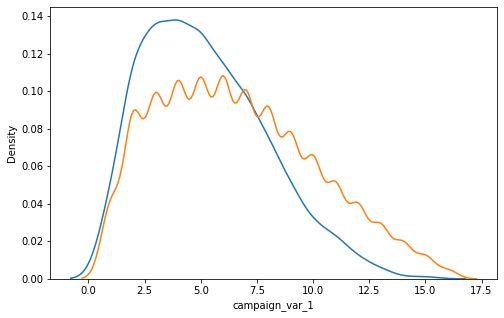

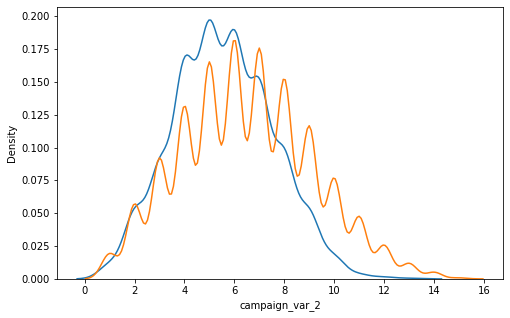

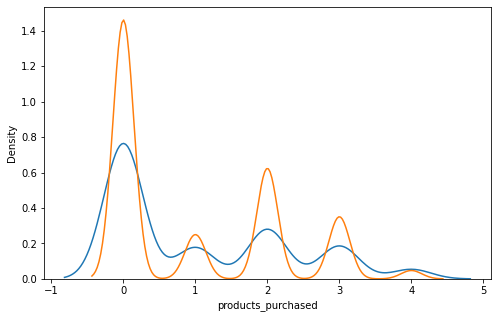

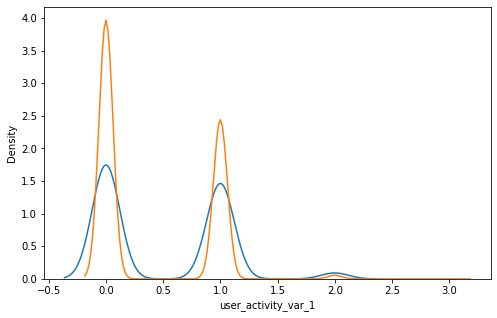

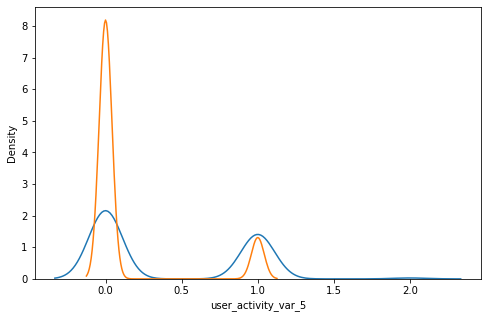

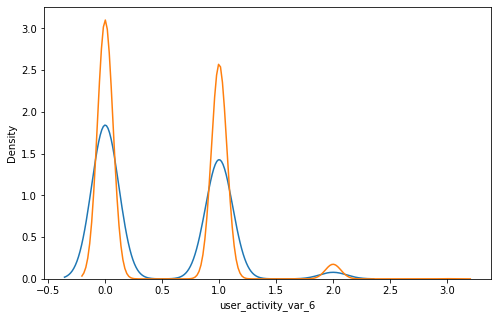

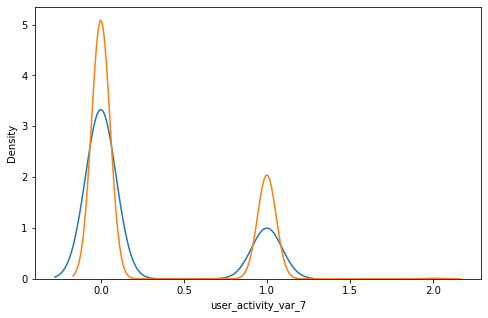

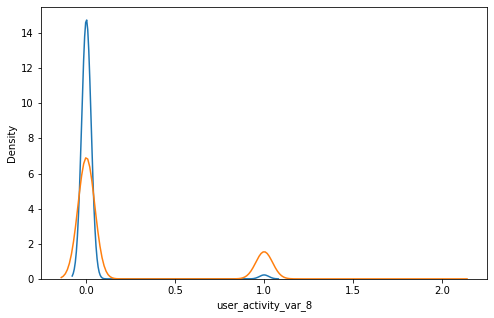

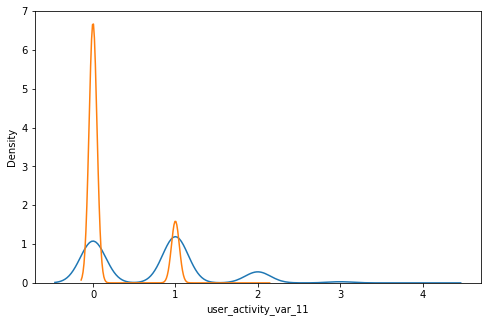

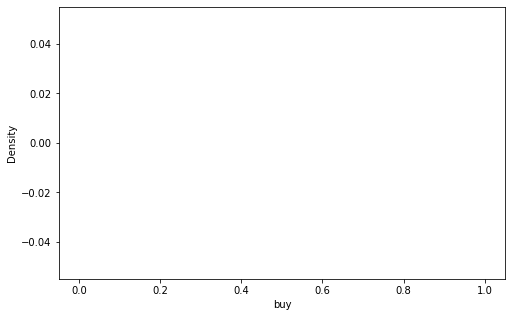

In [ ]:
# Distribution plot
for i in list(test_dataset.describe()):
   plt.figure(figsize=(8,5))
   ax = sns.distplot(buyers[i],label='buy',hist=False)
   ax = sns.distplot(non_buyers[i],label='didnt buy',hist=False)
   ax.set(xlabel=i)
plt.show()

In [ ]:

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(test_dataset[[i for i in test_dataset.describe().columns if i not in ['buy']]])

,variables,VIF
0,campaign_var_1,6.435849
1,campaign_var_2,7.938553
2,products_purchased,1.569130
3,user_activity_var_1,1.514679
4,user_activity_var_5,1.152587
5,user_activity_var_6,1.748143
6,user_activity_var_7,1.327191
7,user_activity_var_8,1.167663
8,user_activity_var_11,1.224487


campaign_var_2 is the feature having VIF greater than 5 so we drop it in order to reduce the multi collinearity in the dataset

In [ ]:
test_dataset=test_dataset.drop(columns=['campaign_var_2'])

In [ ]:
calc_vif(test_dataset[[i for i in test_dataset.describe().columns if i not in ['buy']]])

,variables,VIF
0,campaign_var_1,2.658324
1,products_purchased,1.526388
2,user_activity_var_1,1.478687
3,user_activity_var_5,1.145653
4,user_activity_var_6,1.623772
5,user_activity_var_7,1.285043
6,user_activity_var_8,1.156745
7,user_activity_var_11,1.201268


Here we conclude that the dataset is free from multi collinearity and we can proceed further with the modelling

In [ ]:
# splitting "Date" column into three other columns like "year","month","day".
test_dataset['created_at'] = test_dataset['created_at'].apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
test_dataset['year'] = test_dataset['created_at'].dt.year
test_dataset['month'] = test_dataset['created_at'].dt.month
test_dataset['day'] = test_dataset['created_at'].dt.day_name()

In [ ]:
test_dataset=test_dataset.drop(columns=['created_at','year'],axis=1)

In [ ]:
buyers=test_dataset[test_dataset['buy']==1]
non_buyers=test_dataset[test_dataset['buy']==0]

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(buyers['month'],label='buy',hist=False)
ax = sns.distplot(non_buyers['month'],label='didnt buy',hist=False)
ax.set(xlabel=i)

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(buyers['day'],label='buy',hist=False)
ax = sns.distplot(non_buyers['day'],label='didnt buy',hist=False)
ax.set(xlabel=i)

In [ ]:
lst=list(test_dataset.columns)
lst

['campaign_var_1',
 'products_purchased',
 'user_activity_var_1',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_11',
 'buy',
 'month',
 'day']

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   products_purchased    39161 non-null  float64
 2   user_activity_var_1   39161 non-null  int64  
 3   user_activity_var_5   39161 non-null  int64  
 4   user_activity_var_6   39161 non-null  int64  
 5   user_activity_var_7   39161 non-null  int64  
 6   user_activity_var_8   39161 non-null  int64  
 7   user_activity_var_11  39161 non-null  int64  
 8   buy                   39161 non-null  int64  
 9   month                 39161 non-null  int64  
 10  day                   39161 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 3.3+ MB


In [ ]:
lst=lst.remove('buy')

Here we finalise the list of columns(independent variables) to work with in the model.

In [ ]:
test_dataset=pd.get_dummies(test_dataset, columns=lst, prefix=lst)

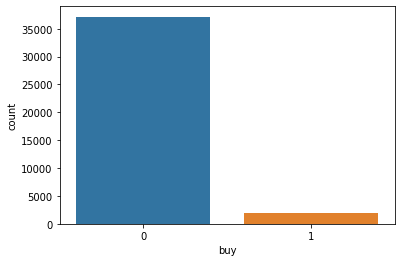

In [ ]:
sns.countplot(x=test_dataset['buy'])

Based on the above visualisation it is clear that the given dataset in highly imbalanced in terms of dependent variable. So we proceed with the oversampling technique.

In [ ]:
#  # Data for all the independent variables
X = test_dataset.drop(labels='buy',axis=1)

#  # Data for the dependent variable
Y = test_dataset['buy']

In [ ]:
X.shape, Y.shape

((39161, 16), (39161,))

In [ ]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

AdaSyn (Adaptive Synthetic Sampling):-
We use this in order to avoid the dominance of high imbalance of the dataset on our model predictions

In [ ]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, Y_train)

In [ ]:
X_train, Y_train=X_resampled, y_resampled

Here we get resampled data out of X train and Y train which is balance and so we will be able to train our model based on this sampled dataset to get highly accurate model.

In [ ]:
Y_train.value_counts()

0    29738
1    29058
Name: buy, dtype: int64

In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(58796, 16) (58796,)
(7833, 16) (7833,)


## **LOGISTIC REGRESSION MODEL WITH K FOLD CROSS VALIDATION**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.05,0.01, 0.1, 1, 10, 100]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.05, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.542120,0.067317,0.010938,0.000620,0.001,{'C': 0.001},0.841183,0.842028,0.845218,0.850669,...,0.843956,0.003709,7,0.844411,0.844485,0.844724,0.842605,0.844556,0.844156,0.000783
1,0.889626,0.031424,0.010329,0.000472,0.05,{'C': 0.05},0.897462,0.897597,0.897630,0.904428,...,0.898874,0.002780,5,0.899345,0.899356,0.899371,0.897757,0.899399,0.899046,0.000645
2,0.740282,0.049175,0.011739,0.001896,0.01,{'C': 0.01},0.889749,0.889985,0.890634,0.897996,...,0.891640,0.003193,6,0.892073,0.892061,0.892251,0.890525,0.892172,0.891816,0.000649
3,0.881155,0.030655,0.010548,0.000466,0.1,{'C': 0.1},0.898152,0.898319,0.898251,0.904926,...,0.899522,0.002704,4,0.899995,0.900002,0.900021,0.898379,0.900060,0.899691,0.000657
4,0.935414,0.063669,0.010763,0.000538,1,{'C': 1},0.898522,0.898673,0.898492,0.904903,...,0.899752,0.002581,1,0.900305,0.900312,0.900307,0.898547,0.900274,0.899949,0.000701
5,0.942865,0.060538,0.010687,0.000468,10,{'C': 10},0.898512,0.898623,0.898121,0.905033,...,0.899693,0.002677,3,0.900241,0.900286,0.900053,0.898694,0.900294,0.899914,0.000616
6,0.906259,0.053385,0.011876,0.002228,100,{'C': 100},0.898371,0.898634,0.898553,0.904942,...,0.899738,0.002607,2,0.900228,0.900315,0.900295,0.898573,0.900289,0.899940,0.000684


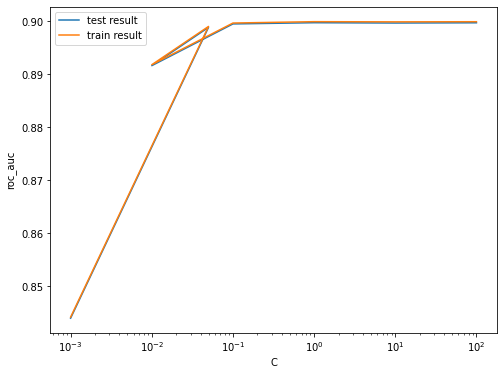

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.8997520064470251 at C = 1


In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=1)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Predictions on the train set
Y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[24831  4907]
 [ 6688 22370]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.8027927069868699
Sensitivity:- 0.7698396310826623
Specificity:- 0.8349922657878808
F1-Score:- 0.7941776870506789


In [ ]:
# Predictions on the train set
Y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[6230 1195]
 [ 183  225]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.8240776203242691
Sensitivity:- 0.5514705882352942
Specificity:- 0.8390572390572391
F1-Score:- 0.2461706783369803


## **RANDOM FOREST**

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, Y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7384686033063474 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [ ]:
# Predictions on the train set
Y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[21160  8578]
 [ 6741 22317]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.7394550649704061
Sensitivity:- 0.7680156927524262
Specificity:- 0.7115475149640191
F1-Score:- 0.7444831784898169


In [ ]:
# Predictions on the train set
Y_test_pred = kn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[7201  224]
 [ 362   46]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.9251883058853568
Sensitivity:- 0.11274509803921569
Specificity:- 0.9698316498316498
F1-Score:- 0.13569321533923304


## **KNN MODEL**

In [ ]:


#Setup arrays to store training and test accuracies
neighbors = np.array([2,5,10,20])
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

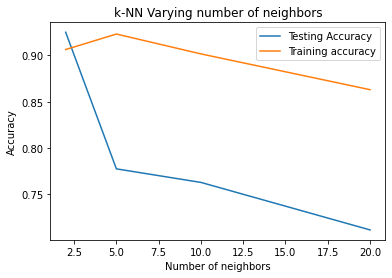

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Fit the model
kn_model=knn.fit(X_train,Y_train)

In [ ]:
# Predictions on the train set
Y_train_pred = kn_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, Y_train_pred)
print(confusion)

[[29738     0]
 [ 5500 23558]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.9064562215116675
Sensitivity:- 0.8107233808245577
Specificity:- 1.0
F1-Score:- 0.895469058841417


In [ ]:
# Predictions on the train set
Y_test_pred = kn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[7201  224]
 [ 362   46]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.9251883058853568
Sensitivity:- 0.11274509803921569
Specificity:- 0.9698316498316498
F1-Score:- 0.13569321533923304


## **XGBOOST ALGORITHM**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.01,0.1,0.5,1,10,50], 
             'subsample': [0.3, 0.6, 0.9,1]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 10, 50],
                         'subsample': [0.3, 0.6, 0.9, 1]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.947416,0.060987,0.077314,0.005381,0.01,0.3,"{'learning_rate': 0.01, 'subsample': 0.3}",0.808324,0.797267,0.811453,0.805681,0.006085,13,0.813488,0.810966,0.803401,0.809285,0.004286
1,4.408902,0.023754,0.070702,0.001176,0.01,0.6,"{'learning_rate': 0.01, 'subsample': 0.6}",0.805045,0.796607,0.809419,0.803691,0.005317,16,0.811166,0.810987,0.801955,0.808036,0.004300
2,3.720568,0.016567,0.069496,0.002631,0.01,0.9,"{'learning_rate': 0.01, 'subsample': 0.9}",0.804924,0.796075,0.810855,0.803952,0.006073,15,0.810284,0.810634,0.803174,0.808030,0.003437
3,3.399951,0.011435,0.068944,0.001114,0.01,1,"{'learning_rate': 0.01, 'subsample': 1}",0.804594,0.797084,0.810859,0.804179,0.005632,14,0.810613,0.811074,0.802913,0.808200,0.003743
4,3.930056,0.031268,0.069738,0.003501,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.908450,0.920557,0.928033,0.919013,0.008069,9,0.936411,0.923642,0.916622,0.925558,0.008192
5,4.394658,0.005070,0.067931,0.003251,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.908393,0.916522,0.927155,0.917357,0.007682,10,0.936504,0.921444,0.916275,0.924741,0.008581
6,3.704909,0.033777,0.067239,0.000698,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.904583,0.921639,0.924790,0.917004,0.008877,11,0.931458,0.924512,0.914232,0.923401,0.007076
7,3.585326,0.400898,0.069900,0.000774,0.1,1,"{'learning_rate': 0.1, 'subsample': 1}",0.902260,0.913845,0.923848,0.913318,0.008821,12,0.928597,0.918557,0.912645,0.919933,0.006585
8,3.931310,0.026104,0.078283,0.001415,0.5,0.3,"{'learning_rate': 0.5, 'subsample': 0.3}",0.915370,0.940231,0.947763,0.934454,0.013841,6,0.954907,0.943221,0.939754,0.945961,0.006482
9,4.370283,0.020026,0.073537,0.000492,0.5,0.6,"{'learning_rate': 0.5, 'subsample': 0.6}",0.917646,0.940323,0.948872,0.935614,0.013176,1,0.954222,0.942658,0.939442,0.945441,0.006346


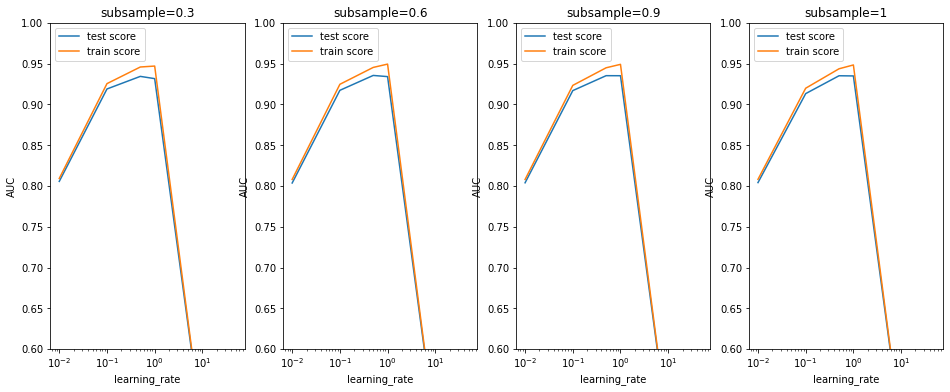

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.01,0.1,0.5,1,10], 
             'subsample': [0.3, 0.6, 0.9,1]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.5, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 1,
           
          
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, Y_train)

XGBClassifier(params={'learning_rate': 1, 'objective': 'binary:logistic',
                      'subsample': 0.6})

In [ ]:
# Predictions on the train set
Y_train_pred = xgb_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = confusion_matrix(Y_train, Y_train_pred)
print(confusion)


[[23725  6013]
 [ 3758 25300]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.833815225525546
Sensitivity:- 0.8706724482070342
Specificity:- 0.7978007935974174
F1-Score:- 0.838150767752729


In [ ]:
Y_test_pred = xgb_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = confusion_matrix(Y_test, Y_test_pred)
print(confusion)


[[5915 1510]
 [ 164  244]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 0.833815225525546
Sensitivity:- 0.5980392156862745
Specificity:- 0.7966329966329966
F1-Score:- 0.2257169287696577
